# Gaussian Processes for Machine Learning

## Kirk Swanson, 2/1/2020, CMSC 35401 Machine Learning for Structure

### C. E. Rasmussen & C. K. I. Williams, Gaussian Processes for Machine Learning, the MIT Press, 2006, ISBN 026218253X.

### Chapter 2: Regression

Gaussian processes (GPs) are a flexible and powerful tool for performing supervised learning tasks, including both regression and classification. Consider the problem of non-linear regression. Instead of selecting a model class and optimizing over a fixed set of parameters, which is the procedure used in parametric modelling approaches, the GP method is a nonparametric approach. It defines a prior probability over every possible function that has certain basic attributes, e.g. smoothness, and then gives higher probability to functions that pass close to the observed data points, which yields a posterior distribution in function space. As a result of this Bayesian approach, GPs are able to provide well-behaved uncertainty estimates for predictions.

A GP can be thought of as a generalization of the multivariate Gaussian distribution. A GP is an example of a stochastic process, which is a generalization of a probability distribution. While a probability distribution governs the behavior of random variables, a stochastic process governs the behavior of random functions, which in this context can be (loosely) thought of as infinitely long random vectors.

GPs are formally defined as a collection of random variables, any finite number of which have a joint Gaussian distribution. The latter phrase is called the "marginalization property" or "consistency", and it is what makes GPs computationally tractable. In the same way that a Gaussian distribution is fully specified by its mean vector and covariance matrix, a GP is fully specified by its mean function and covariance function:

$f(\mathbf{x}) \sim \mathcal{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x'}))$,

mean function: $m(\mathbf{x}) = \mathbb{E}[f(\mathbf{x})]$,

covariance function: $k(\mathbf{x}, \mathbf{x'}) = \mathbb{E}[(f(\mathbf{x}) - m(\mathbf{x}))(f(\mathbf{x'}) - m(\mathbf{'x}))]$.

One can think of the mean function as specifying an infinitely long mean vector and the covariance function as specifying an infinite-by-infinite covariance matrix, where the function value $f$ at input point $x$ is a random variable. 

Let's use a GP to model a non-linear regression problem. Let $X$ be a matrix of observed inputs (each column vector corresponds to a single input), and let $\mathbf{f}$ be the corresponding vector of observed output values, i.e. $(X, \mathbf{f})$ is the training data. Let $X_*$ be a set of inputs that we want predictions for, and let these predictions be labeled as $\mathbf{f}_*$.  

For simplicity assume that the mean function $m(\mathbf{x}) = \mathbf{0}$. By the marginalization property of GPs, we have that

$
\begin{bmatrix}
\mathbf{f}_* \\
\mathbf{f}
\end{bmatrix}
\sim \mathcal{N}
\left(
\mathbf{0}, 
\begin{bmatrix}
K(X_*, X_*) & K(X_*, X) \\
K(X, X_*) & K(X, X)
\end{bmatrix}
\right),
$

where $K(X, X)$ is the section of the covariance matrix that contains the covariances between the input points in $X$, and similarly for $K(X_*, X)$ and $K(X_*, X_*)$.

Using the rules for the multivariate Gaussian joint distribution, we can write

$\mathbf{f}_* \sim \mathcal{N}(\mathbf{0}, K(X_*, X_*)$. 

A common choice for covariance function is the "squared exponential" or "radial basis function":

$k(\mathbf{x}, \mathbf{x'}) = \sigma_f^2e^{\frac{-\left|\mathbf{x} - \mathbf{x'}\right|^2}{2l^2}}$.

A GP defines a prior distribution over functions, which we can sample from by checking values at a finite number of points, $\mathbf{f}_*$. The code below shows some examples with different settings for the length scale $l$ and overall variance $\sigma_f^2$ hyperparameters of the covariance function.

In [204]:
import scipy
from scipy import spatial
import numpy as np
import matplotlib.pyplot as plt

In [205]:
def prior_draw(num_points, num_funcs, sigma, length):
    """
    Plot functions drawn from a GP with mean 0 and RBF covariance function
    num_points: number of input points
    num_funcs: number of functions to draw
    sigma: variance hyperparameter
    length: length hyperparameter
    """
    X_test = np.expand_dims(np.linspace(-5, 5, num_points), axis=1)  # input points, X_*
    K = (sigma**2)*np.exp(-0.5*(1.0/(length**2))*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean')) # covariance matrix K(X_*, X_*)
    u = np.zeros(num_points)  # mean vector
    Y_test = np.random.multivariate_normal(u, K, num_funcs) # draw samples from posterior distribution
    
    # plot functions
    plt.xlim((-5, 5))
    plt.ylim(-10, 10)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(num_funcs):
        plt.plot(X_test, Y_test[i], linestyle='-', marker='o', markersize=2)

\# functions: 1 

$\sigma_f$: 1

$l$: 1

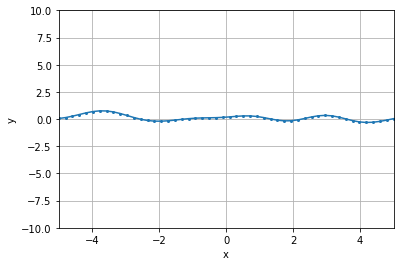

In [206]:
prior_draw(50, 1, 1, 1)

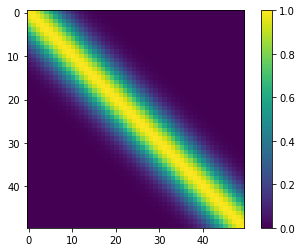

In [207]:
# plot of the covariance matrix 
X_test = np.expand_dims(np.linspace(-5, 5, 50), axis=1)  # input points, X_*
K = (1**2)*np.exp(-0.5*(1.0/(1**2))*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean')) # covariance matrix K(X_*, X_*)
plt.imshow(K)
plt.colorbar()

\# functions: 1 

$\sigma_f$: 2

$l$: 1

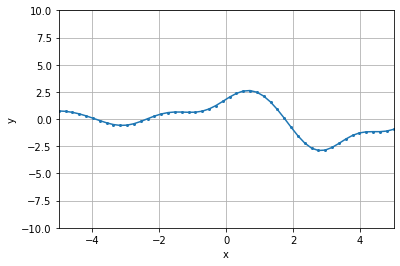

In [208]:
prior_draw(50, 1, 2, 1)

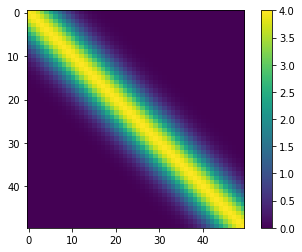

In [209]:
# plot of the covariance matrix 
X_test = np.expand_dims(np.linspace(-5, 5, 50), axis=1) # input points, X_*
K = (2**2)*np.exp(-0.5*(1.0/(1**2))*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean')) # covariance matrix K(X_*, X_*)
plt.imshow(K)
plt.colorbar()

\# functions: 1 

$\sigma_f$: 2

$l$: 0.3

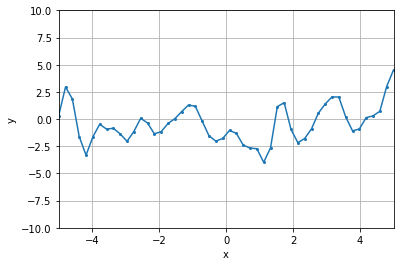

In [210]:
prior_draw(50, 1, 2, 0.3)

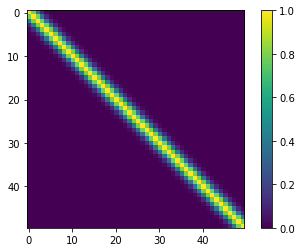

In [211]:
# plot of the covariance matrix 
X_test = np.expand_dims(np.linspace(-5, 5, 50), axis=1) # input points, X_*
K = (1**2)*np.exp(-0.5*(1.0/(0.3**2))*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean')) # covariance matrix K(X_*, X_*)
plt.imshow(K)
plt.colorbar()

\# functions: 50 

$\sigma_f$: 2

$l$: 1

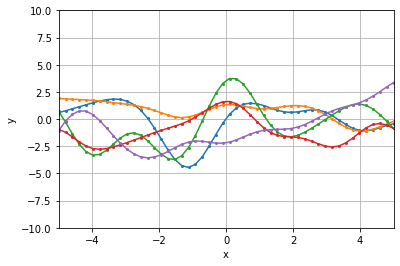

In [212]:
prior_draw(50, 5, 2, 1)

\# functions: 500 

$\sigma_f$: 2

$l$: 1

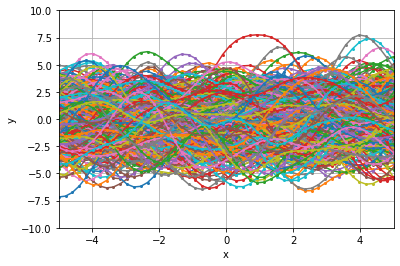

In [213]:
prior_draw(50, 500, 2, 1)

Our central goal is not to draw functions from the prior, but to perform a non-linear regression task, i.e. to make predictions for $\mathbf{f}_*$ given $X_*, X, $ and $\mathbf{f}$. Using the rules for conditional distribution of a multivariate Gaussian, we can write:

$\mathbf{f}_* | X_*, X, \mathbf{f} \sim \mathcal{N}(K(X_*, X)K(X, X)^{-1})\mathbf{f}, K(X_*, X_*) - K(X_*, X)K(X, X)^{-1}K(X, X_*)$.

This gives us predictive distributions, including mean predictions and pointwise uncertainty estimates. Below we show an example of fitting 5 data points.

In [214]:
X_test = np.expand_dims(np.linspace(-5, 5, 100), axis=1)  # test input points
X = np.expand_dims([-4, -3, -1, 0, 1.5], axis=1) # training inputs
Y = np.expand_dims([-2, 0, 1, 2, -1], axis=1) # training observed values
K = np.exp(-0.5*spatial.distance.cdist(X, X, metric='sqeuclidean')) # K(X, X)
K_test_K = np.exp(-0.5*spatial.distance.cdist(X_test, X, metric='sqeuclidean')) # K(X_*, X)
K_test_K_test = np.exp(-0.5*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean')) # K(X_*, X_*)
KK_test = np.exp(-0.5*spatial.distance.cdist(X, X_test, metric='sqeuclidean')) # K(X, X_*)
K_inv = np.linalg.inv(K) # K(X, X)^{-1}
u = np.matmul(np.matmul(K_test_K, K_inv), Y).flatten() # conditional distribution mean vector
cov = K_test_K_test - np.matmul(np.matmul(K_test_K, K_inv), KK_test) # conditional distribution covariance matrix

Below we visualize the conditional distribution covariance matrix, which shows that the covariance is less concentrated on the matrix diagonanal compared to the prior covariance matrices, reflecting a reduction in uncertainty around the observed datapoints.

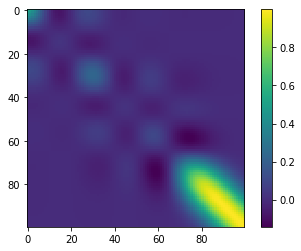

In [215]:
plt.imshow(cov)
plt.colorbar()

Below we plot the mean values of the posterior distribution on the test points as a continuous function (blue curve), along with the training data points (red crosses) and 95% confidence intervals shaded in gray.

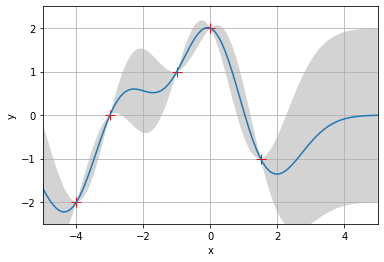

In [216]:
fig, ax = plt.subplots(1)
ax.plot(X, Y, linestyle='', marker="+", color='red', markersize=10) # training data
ax.plot(X_test, u) # mean predictions
ax.fill_between(X_test.flatten(), u+2.0*np.sqrt(cov.diagonal()), u-2.0*np.sqrt(cov.diagonal()), facecolor='lightgrey') # confidence intervals
plt.xlim((-5, 5))
plt.ylim((-2.5, 2.5))
plt.xlabel('x')
plt.ylabel('y')
ax.grid()

Below we draw 30 examples from the posterior distribution (which we visualize as continuous functions).

Text(0, 0.5, 'y')

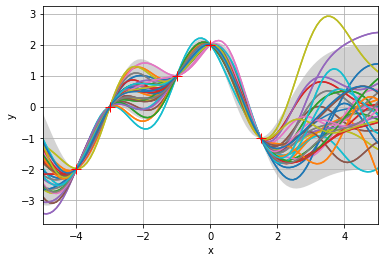

In [217]:
Y_test = np.random.multivariate_normal(u, cov, 30) # draw 30 samples from posterior distribution
fig, ax = plt.subplots(1)
plt.xlim((-5, 5))
ax.plot(X_test, u) # training data
for i in range(30):
    ax.plot(X_test, Y_test[i])
ax.fill_between(X_test.flatten(), u+2.0*np.sqrt(cov.diagonal()), u-2.0*np.sqrt(cov.diagonal()), facecolor='lightgrey')
ax.grid()
for i in range(30):
    plt.plot(X_test, Y_test[i], linestyle='-')
ax.plot(X, Y, linestyle='', marker="+", color='red', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

Oftentimes we do not have access to function values themselves but noisy measurements thereof. In order to model data in this situation, we assume that each measurement is perturbed according to some i.i.d. Gaussian noise, $\epsilon \sim \mathcal{N}(0, \sigma_n^2)$. Given noisy measurements $\mathbf{y}$, our goal is to predict noisy values $\mathbf{y}_*$ of inputs $X_*$. The noisy values are perturbed measurements of some underlying function, $\mathbf{f}_*$. 

The prior on the observations in this case is then governed by the covariance matrix

$\text{cov}(\mathbf{y}) = K(X, X) + \sigma_n^2I$.

The $\mathbf{y}_*$ values are distributed according to:

$\textbf{y}_*|X, \textbf{y}, X_* \sim \mathcal{N}(\bar{\textbf{y}}_*, \text{cov}(\bar{\textbf{y}}_*))$, 

where we have

$\bar{\textbf{y}}_* = \bar{\textbf{f}}_* = K(X_*, X)[K(X, X) + \sigma_n^2I]^{-1}\mathbf{y}$

and 

$\text{cov}(\mathbf{y}_*) = K(X_*, X_*) - K(X_*, X)[K(X, X) + \sigma_n^2I]^{-1}K(X, X_*) + \sigma_n^2I$.

Note that the mean prediction for a single output $y_*$ is a linear combination of the observations $\mathbf{y}$, and that the covariance is the prior covariance minus a term that represents the reduction in uncertainty from the training data. We can more conveniently express the predictive distribution for a single test output using:

$\bar{y}_* = k_*^T(K(X, X) + \sigma_n^2I)^{-1}\mathbf{y}$, 

$\mathbb{V}(y_*) = k(\textbf{x}_*, \textbf{x}_*) - k_*^T(K(X, X) + \sigma_n^2)^{-1}k_* + \sigma_n^2$,

where $k_*$ is the vector of covariances between the test point $x_*$ and the training points.

To compute these quantities, we will use Algorithm 2.1 in the textbook, which utilizes the Cholesky decomposition. 
The Cholesky decomposition of a symmetric, positive definite matrix A decomposes A into a product of a lower triangular matrix L and its transpose:

$LL^T = A$, 

where L is the Cholesky factor. The computation of this factor is very numerically stable and takes $O(n^3/6)$ time for a matrix of size $n\times n$. 

Algorithm 2.1:

$\textbf{input}: X (\text{inputs}), \mathbf{y} (\text{observed measurements}), k (\text{covariance function}), \sigma_n^2 (\text{noise level}), \mathbf{x}_* (\text{test input)}$

$L = \text{cholesky}(K + \sigma_n^2I)$


Solve for $\mathbf{b}$ using forward substitution: $L\mathbf{b} = \mathbf{y}$


Solve for $\mathbf{\alpha}$ using back substitution: $L^T\mathbf{\alpha} = \mathbf{b}$


Solve for the predictive mean: $\bar{y}_* = \mathbf{k}_*^T\mathbf{\alpha}$

Solve for $\mathbf{v}$: $L\mathbf{v} = \mathbf{k}_*$

$\mathbb{V}(y_*) = k(\mathbf{x}_*, \mathbf{x}_*) - \mathbf{v}^T\mathbf{v} + \sigma_n^2$

Below we generate noisy measurements of an underlying sine function and use Algorithm 2.1 to generate predictions. We use the squared exponential covariance function with $\sigma_f^2 = l = 1.$

In [294]:
noise = 0.1 # \sigma_n^2
num_inputs = 500

X = np.expand_dims(np.random.uniform(-4, 4, num_inputs), axis=1) # training inputs
Y = np.expand_dims(np.sin(X).flatten() + np.sqrt(noise)*np.random.randn(num_inputs), axis=1)  # noisy training measurements from a sin function with Gaussian noise N(0, \sigma_n^2)

In [295]:
L = np.linalg.cholesky(np.exp(-0.5*spatial.distance.cdist(X, X, metric='sqeuclidean')) + np.diag(np.zeros(500) + noise)) # Cholesky decomposition of (K(X, X) + \sigma_n^2I)
alpha = np.linalg.solve(L.T, np.linalg.solve(L, Y)) # Solving for \alpha


# Compute the mean and variance of the predictive distribution for a single test point
def mean_var_pred(x_test):
    k_test = np.exp(-0.5*spatial.distance.cdist(x_test, X, metric='sqeuclidean')).T # Compute k_*
    u = np.matmul(k_test.T, alpha) # compute \bar{y}_*
    v = np.linalg.solve(L, k_test) # compute v
    k_test_k_test = np.exp(-0.5*spatial.distance.cdist(x_test, x_test, metric='sqeuclidean')) # Compute k(x_*, x_*)
    Var = k_test_k_test - np.matmul(v.T, v) + noise # Compute Var(y_*)
    return u, Var


x_test = np.linspace(-5, 5, 500) # test inputs
y_pred = np.zeros(500) # vector for mean predictions
y_pred_noise = np.zeros(500) # vector for noisy predictions
for i in range(500):
    y_pred[i], cov = mean_var_pred([[x_test[i]]]) # compute the mean and variance for the i^th test input
    y_pred_noise[i] = np.random.multivariate_normal([y_pred[i]], cov, 1) # sample from the predictive distribution for the i^th test input

The following plot shows the original sine function as a red curve, the noisy measurements of the sine function as blue crosses, the mean of the posterior distributions for test inputs as a green curve, and noisy predictions sampled from the posterior distributions as orange dots. Notice that the uncerainty (spread of orange dots) increases farther away from the training data, as does the error of the predictive mean. 

(-5, 5)

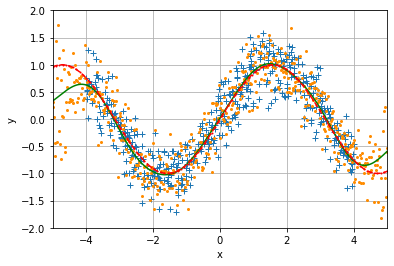

In [296]:
# plot the results
fig, ax = plt.subplots(1)
plt.plot(X, Y, linestyle='', marker='+')
plt.plot(x_test, y_pred_noise, linestyle='', marker='o', markersize=2, color='darkorange')
plt.plot(x_test, y_pred, linestyle='-', color='green')
plt.plot(np.linspace(-5, 5, 100), np.sin(np.linspace(-5, 5, 100)), linestyle='--', marker='o', markersize=1, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.ylim((-2, 2))
plt.xlim((-5, 5))

In fact, if we expand the predictions even farther away from the training data, we see that the GP fails to capture the sinusoid far from 0. The uncertainty increases dramatically and the green curve (mean predictions) is far from sinusoidal.

In [289]:
x_test = np.linspace(-20, 20, 1000) # test inputs
y_pred = np.zeros(1000) # vector for mean predictions
y_pred_noise = np.zeros(1000) # vector for noisy predictions
for i in range(1000):
    y_pred[i], cov = mean_var_pred([[x_test[i]]]) # compute the mean and variance for the i^th test input
    y_pred_noise[i] = np.random.multivariate_normal([y_pred[i]], cov, 1) # sample from the predictive distribution for the i^th test input

(-10, 10)

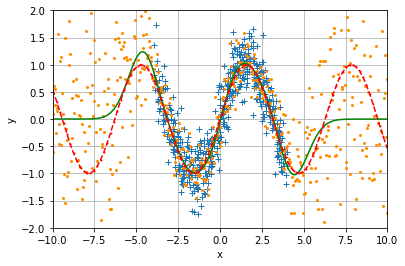

In [290]:
# plot the results
fig, ax = plt.subplots(1)
plt.plot(X, Y, linestyle='', marker='+')
plt.plot(x_test, y_pred_noise, linestyle='', marker='o', markersize=2, color='darkorange')
plt.plot(x_test, y_pred, linestyle='-', color='green')
plt.plot(np.linspace(-20, 20, 200), np.sin(np.linspace(-20, 20, 200)), linestyle='--', marker='o', markersize=1, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.ylim((-2, 2))
plt.xlim((-10, 10))

If we believe that the data exhibits periodic behavior, then we might want to reflect that belief in our choice of covariance function. So instead of using a squared exponential, we can use a periodic covariance function,

$k(\mathbf{x}, \mathbf{x'}) = \frac{-2.0 \text{ sin}(\frac{\pi|\mathbf{x} - \mathbf{x'}|}{p})^2}{l^2}$

where $l$ is the length scale and $p$ is the periodicity. Below we model the same data using $p = 2\pi$ and $l = 1$.

In [300]:
p = 2.0*np.pi #periodicity
l = 1.0 # length scale


L = np.linalg.cholesky(np.exp(-2.0*(1/l**2)*(np.sin(np.pi*spatial.distance.cdist(X, X, metric='euclidean')/p))**2) + np.diag(np.zeros(num_inputs) + noise)) # Cholesky decomposition of (K(X, X) + \sigma_n^2I)
alpha = np.linalg.solve(L.T, np.linalg.solve(L, Y)) # Solving for \alpha


# Compute the mean and variance of the predictive distribution for a single test point
def mean_var_pred(x_test):
    k_test = np.exp(-2.0*(1/l**2)*(np.sin(np.pi*spatial.distance.cdist(x_test, X, metric='euclidean')/p))**2).T # Compute k_*
    u = np.matmul(k_test.T, alpha) # compute \bar{y}_*
    v = np.linalg.solve(L, k_test) # compute v
    k_test_k_test = np.exp(-2.0*(1/l**2)*(np.sin(np.pi*spatial.distance.cdist(x_test, x_test, metric='euclidean')/p))**2) # Compute k(x_*, x_*)
    Var = k_test_k_test - np.matmul(v.T, v) + noise # Compute Var(y_*)
    return u, Var



for i in range(500):
    y_pred[i], cov = mean_var_pred([[x_test[i]]]) # compute the mean and variance for the i^th test input
    y_pred_noise[i] = np.random.multivariate_normal([y_pred[i]], cov, 1) # sample from the predictive distribution for the i^th test input

Using the same legend as for the plot above, we can see that this periodic covariance function yields a predictive distribution that fits the underlying sinusoid far better farther away from the bulk of the data:

(-10, 10)

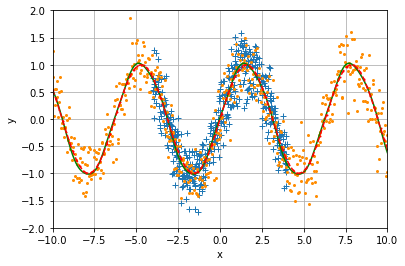

In [301]:
# Plot the results
fig, ax = plt.subplots(1)
plt.plot(X, Y, linestyle='', marker='+')
plt.plot(x_test, y_pred_noise, linestyle='', marker='o', markersize=2, color='darkorange')
plt.plot(x_test, y_pred, linestyle='-', color='green')
plt.plot(np.linspace(-10, 10, 100), np.sin(np.linspace(-10, 10, 100)), linestyle='--', marker='o', markersize=1, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.ylim((-2, 2))
plt.xlim((-10, 10))

(-5, 5)

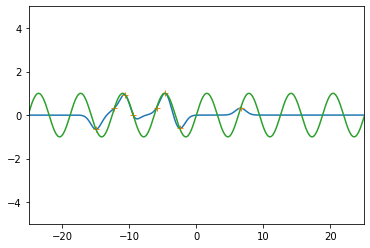

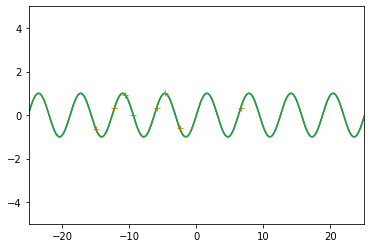

In [200]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, ExpSineSquared

np.random.seed(1)


def f(x):
    """The function to predict."""
    return np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X =  np.expand_dims(np.random.uniform(-15, 15, 8), axis=1)

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(-50, 50, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 10))
kernel2 = ExpSineSquared(10, 2.0*np.pi, length_scale_bounds=(1e-2, 1e2), periodicity_bounds=(1, 10))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp2 = GaussianProcessRegressor(kernel=kernel2, n_restarts_optimizer=10)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)
gp2.fit(X, y)
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred = gp.predict(x)
y_pred2 = gp2.predict(x)
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE

plt.figure(0)
plt.plot(x, y_pred)
plt.plot(X, y, linestyle='', marker='+')
plt.plot(x, f(x))
plt.xlim((-25, 25))
plt.ylim((-5, 5))

plt.figure(1)
plt.plot(x, y_pred2)
plt.plot(X, y, linestyle='', marker='+')
plt.plot(x, f(x))
plt.xlim((-25, 25))
plt.ylim((-5, 5))

